## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from datetime import datetime
import plotly.express as px
%matplotlib inline

In [3]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 31.5 MB/s 
     |████████████████████████████████| 6.3 MB 40.1 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [4]:
#Need to install geopandas(!pip install geopandas) manually  
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from shapely import wkt

In [5]:
df=pd.read_csv('/content/drive/MyDrive/capstone/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
df['last_review'].fillna(value=df['last_review'].mode()[0],inplace=True)
df['reviews_per_month'].fillna(value=df['reviews_per_month'].mode()[0],inplace=True)
df.dropna(axis=0,inplace=True)
df.isnull().sum()/len(df)*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [9]:
# Remove Unwanted Columns
df.drop('id',axis=1,inplace=True)

In [10]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
shape_file = gpd.read_file('/content/drive/MyDrive/capstone/USA/USA_adm1.shp')

In [ ]:
type(shape_file)

geopandas.geodataframe.GeoDataFrame

In [ ]:
shape_file.head(5)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,244,USA,United States,1,Alabama,State,State,None,AL|Ala.,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-179.13147 51.20972, -179.1322..."
2,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
3,244,USA,United States,3,Arizona,State,State,None,AZ|Ariz.,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
4,244,USA,United States,4,Arkansas,State,State,None,AR|Ark.,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."


In [ ]:
import descartes
from shapely.geometry import Point,Polygon

In [ ]:
geometry=[Point(xy) for xy in zip(df['longitude'],df['latitude'])]
geometry[:3]

In [ ]:
crs={'init':'epsg:4326'}

In [ ]:
geo_df = gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365,POINT (-73.94190 40.80902)
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


KeyError: ignored

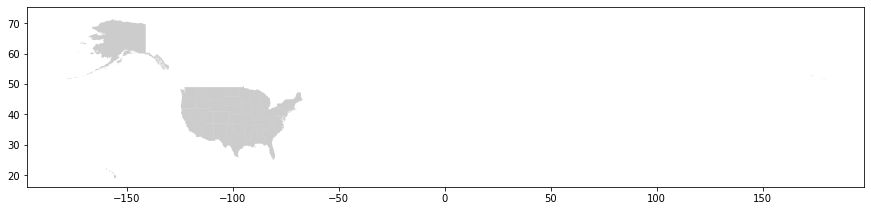

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
shape_file.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['price']].plot(ax=ax,markersize=29,color='blue',marker="o",label='Neg')
plt.legend(prop={'size':15})

In [ ]:
ny_map = plt.imread('/content/drive/MyDrive/capstone/preview-mapz-My map 20211025-1943-513418.jpg')

In [ ]:
BoundaryBox = (df.longitude.min(), df.longitude.max(), df.latitude.min(),df.latitude.max())
print(BoundaryBox)

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)


In [ ]:
airbnb_cheapest100 = df.sort_values('price',ascending=True, inplace=False).head(100)
airbnb_cheapest100 = df[df.price > 0]

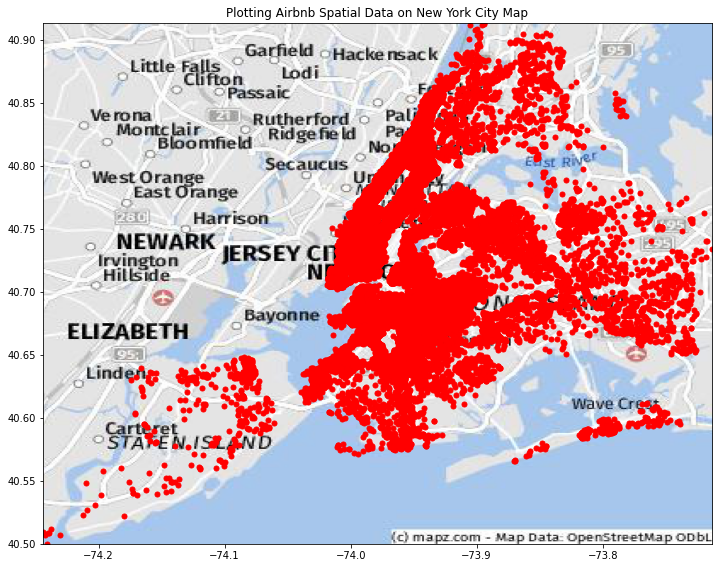

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(airbnb_cheapest100.longitude, airbnb_cheapest100.latitude, zorder=1, alpha= 1, c='red', s=25)
ax.set_title('Plotting Airbnb Spatial Data on New York City Map')
ax.set_xlim(BoundaryBox[0],BoundaryBox[1])
ax.set_ylim(BoundaryBox[2],BoundaryBox[3])
ax.imshow(ny_map, zorder=0, extent = BoundaryBox, aspect= 'equal')

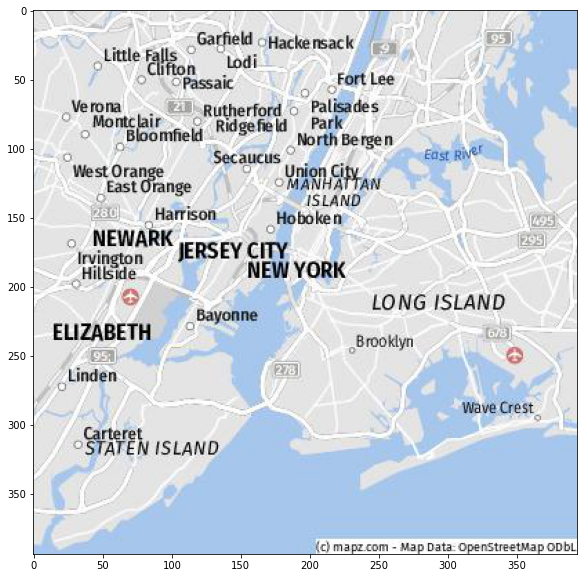

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(ny_map)

In [ ]:
df_nyc=df.copy()
points=df_nyc.apply(lambda x:Point(x.longitude,x.latitude),axis=1)
geodf_nyc=gpd.GeoDataFrame(df_nyc,geometry=points)
nbhoods = pd.read_csv('/content/drive/MyDrive/capstone/nynta.csv')
#nbhoods = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\airbnb\\nynta.csv')
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)
nbhoods.drop('the_geom',axis=1,inplace=True)
#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')

(-74.28337047814921,
 -73.67222994821336,
 40.475144526098404,
 40.936503646095986)

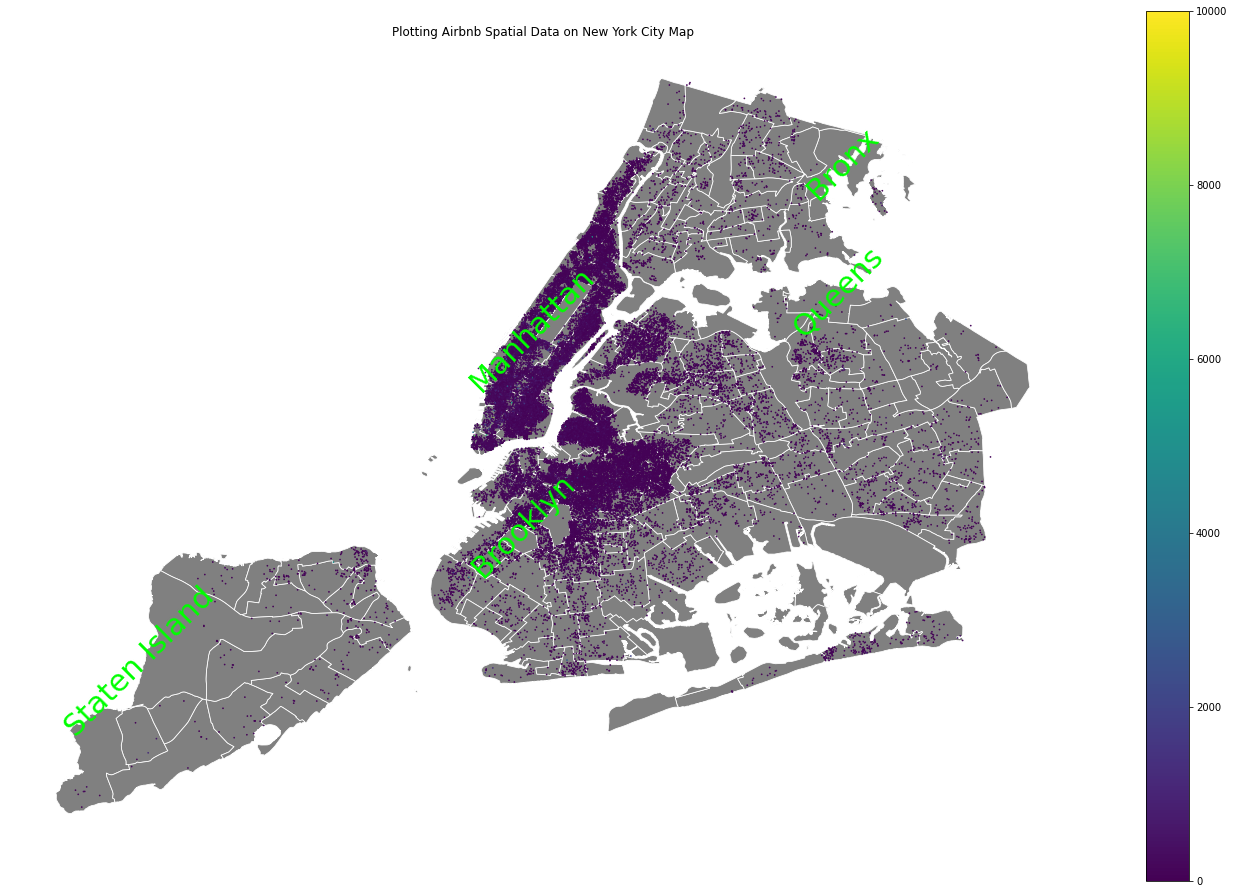

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
ax.set_title('Plotting Airbnb Spatial Data on New York City Map')
base=nbhoods.plot(color='grey',edgecolor='white',ax=ax,linewidth=.8)
c=list(df_nyc.neighbourhood_group.unique())
for idx, row in nbhoods.iterrows():
    if row['BoroName'] in c:
        plt.annotate(s=row['BoroName'], xy=row.geom.centroid.coords[0],
                     horizontalalignment='center',color='lime',rotation=45, size=30)
        c.remove(row['BoroName'])
    else:
        pass



geodf_nyc.plot(column='price',ax=base,markersize=.5,legend=True,cmap='viridis')
base.axis('off')

Is there any noticeable difference of traffic among different areas?

> Traffic in Staten Island,Bronx,Queens is lower than Brooklyn and Manhattan, so Brooklyn & Manhattan are the busiest.



**Statistical Tests**

> Perform a statistical test :- Whether the average price of rooms across all neighbourhood groups is similar or not



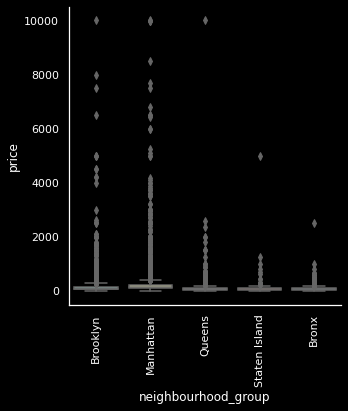

In [ ]:
fig = sns.catplot(x='neighbourhood_group',y='price',kind='box',data=df)
fig.set_xticklabels(rotation=90)

In [ ]:
group1 = df[['price','neighbourhood_group']].groupby(by='neighbourhood_group')
group1.mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.469238
1,Brooklyn,124.410523
2,Manhattan,196.897473
3,Queens,99.536017
4,Staten Island,114.812332


>Hypothesis Testing
H0 : price of rooms in Bronx and Queens are equal.
HA : price of rooms in Bronx and Queens are not equal

In [ ]:
B = group1.get_group('Bronx')
Q = group1.get_group('Queens')

In [ ]:
m1 = B.mean()
s1 = B.std() # pandas cal dof -> (n-1)

m2= Q.mean()
s2 = Q.std()

print('Mean for price in Bronx {} \n Mean for price in Queens {}'.format(m2,m1))
print('Std for price in Bronx {} \n Std for price in Queens {}'.format(s2,s1))

Mean for price in Bronx price    99.536017
dtype: float64 
 Mean for price in Queens price    87.469238
dtype: float64
Std for price in Bronx price    167.128794
dtype: float64 
 Std for price in Queens price    106.798933
dtype: float64


In [ ]:
n1 = len(B)
n2= len(Q)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

from scipy import stats



1089 5664
dof 6751
SP_2 = price    14069.367418
dtype: float64
SP price    118.614364
dtype: float64
tvalue -3.0745479084185114


In [ ]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.960315442008931

In [ ]:
stats.t.ppf(0.975,dof)

1.9603154420089306

As t_value is not in the range so rejecting null hypothesis


> price of rooms in Bronx and Queens are not equal



>Hypothesis Testing
H0 : price of rooms in Brooklyn and Staten Island are equal.
HA : price of rooms in Brooklyn and Staten Island are not equal

In [ ]:
Br = group1.get_group('Brooklyn')
Staten = group1.get_group('Staten Island')

In [ ]:
m1 = Br.mean()
s1 = Br.std() # pandas cal dof -> (n-1)

m2= Staten.mean()
s2 = Staten.std()

In [ ]:
n1 = len(Br)
n2= len(Staten)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


20089 373
dof 20460
SP_2 = price    76307.129058
dtype: float64
SP price    276.23745
dtype: float64
tvalue 0.6649153421005832


In [ ]:
# t-distribution
stats.t.cdf(t_val[0],dof) 

0.7469439317128295

In [ ]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.960079938068326

In [ ]:
stats.t.ppf(0.975,dof)

1.9600799380683256

In [ ]:
t_val

price    0.664915
dtype: float64

As t_value is in the range so accepting null hypothesis


> price of rooms in Brooklyn and Staten Island are equal

>Hypothesis Testing
H0 : price of rooms in Brooklyn and Manhattan are equal.
HA : price of rooms in Brooklyn  and Manhattan are not equal

In [ ]:
Man = group1.get_group('Manhattan')

In [ ]:
m2= Man.mean()
s2 = Man.std()

In [ ]:
n2= len(Man)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


20089 21643
dof 41730
SP_2 = price    59024.446313
dtype: float64
SP price    242.949473
dtype: float64
tvalue -30.454196954037222


In [ ]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9600208342613321

In [ ]:
stats.t.ppf(0.975,dof)

1.9600208342613317

In [ ]:
t_val

price   -30.454197
dtype: float64

In [ ]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365,POINT (-73.94190 40.80902)
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


As t_value is quite large and definitely not in the range so rejecting null hypothesis


> price of rooms in Brooklyn and Manhattan are not equal

**Statistical test**
> if they are related what should be case ?


    - there are speicific kind of rooms related to neighbourhood groups
    - assocation


>if they are not related what should be case ?

    - room type does not depend on neighbourhood groups
    - independent
    
- HO: No Related (no association)
    - alpha > 0.05
- HA: Realted (association)
    - alpha < 0.05

## $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

In [ ]:
comp_loc = pd.crosstab(df['neighbourhood_group'],df['room_type'],margins=True)
comp_loc

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,378,652,59,1089
Brooklyn,9553,10123,413,20089
Manhattan,13190,7973,480,21643
Queens,2096,3370,198,5664
Staten Island,176,188,9,373
All,25393,22306,1159,48858


In [ ]:
N = comp_loc.iloc[-1,-1]
N

48858

In [ ]:
rows,cols  = comp_loc.shape
rows,cols

(6, 4)

In [ ]:
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =565.9866756723566
For 1 row and 0 col the e =10440.86898767858
For 2 row and 0 col the e =11248.530414671088
For 3 row and 0 col the e =2943.754390273855
For 4 row and 0 col the e =193.85953170412216
For 0 row and 1 col the e =497.18027753899054
For 1 row and 1 col the e =9171.58365057923
For 2 row and 1 col the e =9881.05853698473
For 3 row and 1 col the e =2585.8853002578903
For 4 row and 1 col the e =170.29223463915838
For 0 row and 2 col the e =25.83304678865283
For 1 row and 2 col the e =476.54736174219164
For 2 row and 2 col the e =513.411048344181
For 3 row and 2 col the e =134.36030946825494
For 4 row and 2 col the e =8.848233656719472


In [ ]:
# E_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [ ]:
O_ij.shape, E_ij.shape

((5, 3), (5, 3))

In [ ]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [ ]:
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [ ]:
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 1557.1593152401288


In [ ]:
DOF = (n_row-1)*(n_col-1)
print('Degree of Freedom =',DOF)

Degree of Freedom = 8


In [ ]:
alpha = stats.chi2.pdf(chisquare_value,DOF)
pval = 1-alpha

In [ ]:
print('the alpha =',alpha)

the alpha = 0.0


# Since alpha is less than 0.05 hence , neighbourhood_group and room type are related

In [ ]:
df_new=df_nyc.loc[df_nyc['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens'])]
fig = px.bar(x='neighbourhood_group',y='price',data_frame=df_new.groupby(['neighbourhood_group']).mean().reset_index(),text='neighbourhood_group',color='neighbourhood_group',opacity=.8)
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(yaxis=dict(
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')

In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 47 kB/s 


In [ ]:
import os

if not os.path.exists("'/content/drive/MyDrive/capstone/images"):
    os.mkdir("/content/drive/MyDrive/capstone/images")

In [ ]:
fig.write_image("/content/drive/MyDrive/capstone/images/fig1.png")


ValueError: ignored